In this part 3 of Modelling, it will be on a different set of 2 styles: Industrial and Scandinavian

In [1]:
from PIL import Image
from matplotlib import image
from matplotlib import pyplot as plt
from numpy import asarray
from sklearn.model_selection import train_test_split
import random

from keras.preprocessing.image import ImageDataGenerator

from os import listdir
import os

from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

Using TensorFlow backend.


---
## Train Test Split

In [2]:
src = './data/simple/raw2/'

In [3]:
target = './data/simple/processed2/'

In [5]:
for style in listdir(src):
        
    print(f'Currently processing style: {style}')
        
    # load all images in a list
    loaded_images = list()
    for img in listdir(src +'/' + style):
        # load image
        pict = Image.open(src +'/' + style + '/' + img)
        pict = pict.convert('RGB') # ensure image is in 'RGB' to save as jpg
        pict_array = asarray(pict)
            # img_data = image.imread(src +'/' + style + '/' + img)
        # store loaded image
        loaded_images.append([img[:-4], pict_array])
        print('> loaded %s %s' % (img, pict_array.shape))
        
    random.shuffle(loaded_images)
    length = len(loaded_images)
    split_len = round(length*0.8)
    train = loaded_images[:split_len]
    test = loaded_images[split_len:]
    
    if not os.path.exists(target + '/train/' + style):
        os.makedirs(target + '/train/' + style)
    if not os.path.exists(target + '/test/' + style):
        os.makedirs(target + '/test/' + style)
        
    for pict_array in train:
        print(f'Saving train image: {pict_array[0]}')
        pict_name = pict_array[0]
        pict = Image.fromarray(pict_array[1])
        pict.save(target + '/train/' + style + '/' + pict_name + '.jpg', quality=100)
        print(f'Saved train image: {pict_array[0]}')
        
    for pict_array in test:
        print(f'Saving test image: {pict_array[0]}')
        pict_name = pict_array[0]
        pict = Image.fromarray(pict_array[1])
        pict.save(target + '/test/' + style + '/' + pict_name + '.jpg', quality=100)
        print(f'Saved test image: {pict_array[0]}')
        
    print('*********************************************************************************')

Currently processing style: Industrial
> loaded 11649.jpg (690, 1080, 3)
> loaded 11651.jpg (634, 1080, 3)
> loaded 11653.jpg (721, 1080, 3)
> loaded 11654.jpg (721, 1080, 3)
> loaded 11655.jpg (676, 1080, 3)
> loaded 11662.jpg (1369, 1080, 3)
> loaded 11663.jpg (640, 1080, 3)
> loaded 11664.jpg (742, 1080, 3)
> loaded 11665.jpg (736, 1080, 3)
> loaded 11666.jpg (1452, 1080, 3)
> loaded 11667.jpg (1185, 1080, 3)
> loaded 11668.jpg (1489, 1080, 3)
> loaded 11713.jpg (1135, 1080, 3)
> loaded 11714.jpg (720, 1080, 3)
> loaded 11715.jpg (720, 1080, 3)
> loaded 11716.jpg (720, 1080, 3)
> loaded 11717.jpg (1620, 1080, 3)
> loaded 11718.jpg (696, 1080, 3)
> loaded 11719.jpg (1620, 1080, 3)
> loaded 12120.jpg (1620, 1080, 3)
> loaded 12121.jpg (720, 1080, 3)
> loaded 12122.jpg (1620, 1080, 3)
> loaded 12124.jpg (720, 1080, 3)
> loaded 12126.jpg (721, 1080, 3)
> loaded 12127.jpg (720, 1080, 3)
> loaded 12129.jpg (720, 1080, 3)
> loaded 125625.jpg (1825, 1080, 3)
> loaded 125626.jpg (1620, 1080,

> loaded 230915.jpg (720, 1080, 3)
> loaded 230916.jpg (664, 1080, 3)
> loaded 230918.jpg (720, 1080, 3)
> loaded 230920.jpg (720, 1080, 3)
> loaded 230921.jpg (648, 1080, 3)
> loaded 230922.jpg (1512, 1080, 3)
> loaded 232430.jpg (720, 1080, 3)
> loaded 232432.jpg (720, 1080, 3)
> loaded 232433.jpg (723, 1080, 3)
> loaded 232434.jpg (1620, 1080, 3)
> loaded 232436.jpg (720, 1080, 3)
> loaded 232437.jpg (720, 1080, 3)
> loaded 23357.jpg (826, 1080, 3)
> loaded 23358.jpg (780, 1080, 3)
> loaded 23360.jpg (1599, 1080, 3)
> loaded 23361.jpg (783, 1080, 3)
> loaded 23362.jpg (753, 1080, 3)
> loaded 23363.jpg (844, 1080, 3)
> loaded 23364.jpg (720, 1080, 3)
> loaded 23365.jpg (880, 1080, 3)
> loaded 233801.jpg (720, 1080, 3)
> loaded 233802.jpg (720, 1080, 3)
> loaded 233803.jpg (720, 1080, 3)
> loaded 233804.jpg (720, 1080, 3)
> loaded 233805.jpg (720, 1080, 3)
> loaded 233806.jpg (720, 1080, 3)
> loaded 233808.jpg (720, 1080, 3)
> loaded 233809.jpg (720, 1080, 3)
> loaded 23463.jpg (720, 

> loaded 281900.jpg (721, 1080, 3)
> loaded 281901.jpg (721, 1080, 3)
> loaded 281903.jpg (721, 1080, 3)
> loaded 281904.jpg (721, 1080, 3)
> loaded 281905.jpg (721, 1080, 3)
> loaded 282181.jpg (720, 1080, 3)
> loaded 282183.jpg (720, 1080, 3)
> loaded 282185.jpg (720, 1080, 3)
> loaded 282189.jpg (720, 1080, 3)
> loaded 282190.jpg (720, 1080, 3)
> loaded 282199.jpg (740, 1080, 3)
> loaded 282200.jpg (720, 1080, 3)
> loaded 282203.jpg (720, 1080, 3)
> loaded 282204.jpg (720, 1080, 3)
> loaded 282205.jpg (747, 1080, 3)
> loaded 283095.jpg (1620, 1080, 3)
> loaded 283096.jpg (720, 1080, 3)
> loaded 283097.jpg (720, 1080, 3)
> loaded 283098.jpg (720, 1080, 3)
> loaded 283099.jpg (720, 1080, 3)
> loaded 283101.jpg (720, 1080, 3)
> loaded 283222.jpg (720, 1080, 3)
> loaded 283224.jpg (720, 1080, 3)
> loaded 283225.jpg (1620, 1080, 3)
> loaded 283228.jpg (720, 1080, 3)
> loaded 283229.jpg (720, 1080, 3)
> loaded 283230.jpg (720, 1080, 3)
> loaded 283231.jpg (720, 1080, 3)
> loaded 288589.jp

> loaded 353398.jpg (721, 1080, 3)
> loaded 353400.jpg (721, 1080, 3)
> loaded 353401.jpg (1618, 1080, 3)
> loaded 353402.jpg (721, 1080, 3)
> loaded 353403.jpg (1618, 1080, 3)
> loaded 353404.jpg (721, 1080, 3)
> loaded 353406.jpg (721, 1080, 3)
> loaded 353407.jpg (721, 1080, 3)
> loaded 353540.jpg (720, 1080, 3)
> loaded 353685.jpg (1620, 1080, 3)
> loaded 353686.jpg (1620, 1080, 3)
> loaded 353687.jpg (1620, 1080, 3)
> loaded 353688.jpg (720, 1080, 3)
> loaded 353689.jpg (1620, 1080, 3)
> loaded 353690.jpg (720, 1080, 3)
> loaded 353693.jpg (1620, 1080, 3)
> loaded 353694.jpg (720, 1080, 3)
> loaded 353695.jpg (720, 1080, 3)
> loaded 359562.jpg (771, 1080, 3)
> loaded 359563.jpg (1620, 1080, 3)
> loaded 359564.jpg (1620, 1080, 3)
> loaded 359565.jpg (720, 1080, 3)
> loaded 359566.jpg (720, 1080, 3)
> loaded 359567.jpg (720, 1080, 3)
> loaded 359568.jpg (720, 1080, 3)
> loaded 359569.jpg (720, 1080, 3)
> loaded 359570.jpg (720, 1080, 3)
> loaded 359571.jpg (720, 1080, 3)
> loaded 35

> loaded 417869.jpg (720, 1080, 3)
> loaded 417870.jpg (1619, 1080, 3)
> loaded 417874.jpg (1619, 1080, 3)
> loaded 417895.jpg (720, 1080, 3)
> loaded 417896.jpg (720, 1080, 3)
> loaded 417897.jpg (720, 1080, 3)
> loaded 417899.jpg (720, 1080, 3)
> loaded 417900.jpg (720, 1080, 3)
> loaded 417901.jpg (720, 1080, 3)
> loaded 417904.jpg (722, 1080, 3)
> loaded 417905.jpg (720, 1080, 3)
> loaded 417906.jpg (720, 1080, 3)
> loaded 417908.jpg (720, 1080, 3)
> loaded 418700.jpg (1599, 1080, 3)
> loaded 418702.jpg (1580, 1080, 3)
> loaded 418703.jpg (677, 1080, 3)
> loaded 418704.jpg (741, 1080, 3)
> loaded 418705.jpg (718, 1080, 3)
> loaded 418706.jpg (1627, 1080, 3)
> loaded 418707.jpg (1631, 1080, 3)
> loaded 418708.jpg (720, 1080, 3)
> loaded 418709.jpg (1621, 1080, 3)
> loaded 419198.jpg (720, 1080, 3)
> loaded 419199.jpg (720, 1080, 3)
> loaded 419200.jpg (720, 1080, 3)
> loaded 419203.jpg (720, 1080, 3)
> loaded 419204.jpg (720, 1080, 3)
> loaded 419205.jpg (720, 1080, 3)
> loaded 4192

> loaded 437244.jpg (1620, 1080, 3)
> loaded 437245.jpg (720, 1080, 3)
> loaded 437248.jpg (1620, 1080, 3)
> loaded 437250.jpg (1620, 1080, 3)
> loaded 437253.jpg (720, 1080, 3)
> loaded 437254.jpg (720, 1080, 3)
> loaded 437258.jpg (1531, 1080, 3)
> loaded 437261.jpg (720, 1080, 3)
> loaded 437433.jpg (720, 1080, 3)
> loaded 437434.jpg (1620, 1080, 3)
> loaded 437435.jpg (720, 1080, 3)
> loaded 437439.jpg (721, 1080, 3)
> loaded 437440.jpg (720, 1080, 3)
> loaded 437441.jpg (720, 1080, 3)
> loaded 437442.jpg (720, 1080, 3)
> loaded 437449.jpg (720, 1080, 3)
> loaded 437450.jpg (720, 1080, 3)
> loaded 438130.jpg (720, 1080, 3)
> loaded 438133.jpg (720, 1080, 3)
> loaded 438134.jpg (726, 1080, 3)
> loaded 438136.jpg (729, 1080, 3)
> loaded 438137.jpg (720, 1080, 3)
> loaded 438138.jpg (720, 1080, 3)
> loaded 438139.jpg (666, 1080, 3)
> loaded 438140.jpg (720, 1080, 3)
> loaded 438141.jpg (744, 1080, 3)
> loaded 438145.jpg (720, 1080, 3)
> loaded 440081.jpg (720, 1080, 3)
> loaded 440082

Saved train image: 270925
Saving train image: 11668
Saved train image: 11668
Saving train image: 406433
Saved train image: 406433
Saving train image: 226111
Saved train image: 226111
Saving train image: 429946
Saved train image: 429946
Saving train image: 265463
Saved train image: 265463
Saving train image: 440086
Saved train image: 440086
Saving train image: 437435
Saved train image: 437435
Saving train image: 281856
Saved train image: 281856
Saving train image: 431355
Saved train image: 431355
Saving train image: 260209
Saved train image: 260209
Saving train image: 417899
Saved train image: 417899
Saving train image: 417874
Saved train image: 417874
Saving train image: 160973
Saved train image: 160973
Saving train image: 300913
Saved train image: 300913
Saving train image: 302886
Saved train image: 302886
Saving train image: 302889
Saved train image: 302889
Saving train image: 444241
Saved train image: 444241
Saving train image: 363791
Saved train image: 363791
Saving train image: 26

Saved train image: 24343
Saving train image: 417866
Saved train image: 417866
Saving train image: 268489
Saved train image: 268489
Saving train image: 336568
Saved train image: 336568
Saving train image: 260199
Saved train image: 260199
Saving train image: 253708
Saved train image: 253708
Saving train image: 421507
Saved train image: 421507
Saving train image: 268000
Saved train image: 268000
Saving train image: 281553
Saved train image: 281553
Saving train image: 441216
Saved train image: 441216
Saving train image: 125631
Saved train image: 125631
Saving train image: 144123
Saved train image: 144123
Saving train image: 265475
Saved train image: 265475
Saving train image: 438141
Saved train image: 438141
Saving train image: 424637
Saved train image: 424637
Saving train image: 219723
Saved train image: 219723
Saving train image: 338964
Saved train image: 338964
Saving train image: 383971
Saved train image: 383971
Saving train image: 264307
Saved train image: 264307
Saving train image: 3

Saved train image: 222262
Saving train image: 431330
Saved train image: 431330
Saving train image: 379509
Saved train image: 379509
Saving train image: 419444
Saved train image: 419444
Saving train image: 281545
Saved train image: 281545
Saving train image: 368130
Saved train image: 368130
Saving train image: 20272
Saved train image: 20272
Saving train image: 431267
Saved train image: 431267
Saving train image: 377651
Saved train image: 377651
Saving train image: 270933
Saved train image: 270933
Saving train image: 254548
Saved train image: 254548
Saving train image: 282183
Saved train image: 282183
Saving train image: 351142
Saved train image: 351142
Saving train image: 431275
Saved train image: 431275
Saving train image: 247449
Saved train image: 247449
Saving train image: 437253
Saved train image: 437253
Saving train image: 134434
Saved train image: 134434
Saving train image: 299088
Saved train image: 299088
Saving train image: 17961
Saved train image: 17961
Saving train image: 3249

Saved train image: 301037
Saving train image: 283228
Saved train image: 283228
Saving train image: 425724
Saved train image: 425724
Saving train image: 270900
Saved train image: 270900
Saving train image: 419204
Saved train image: 419204
Saving train image: 447555
Saved train image: 447555
Saving train image: 377648
Saved train image: 377648
Saving train image: 421626
Saved train image: 421626
Saving train image: 11663
Saved train image: 11663
Saving train image: 433882
Saved train image: 433882
Saving train image: 438136
Saved train image: 438136
Saving train image: 270891
Saved train image: 270891
Saving train image: 422238
Saved train image: 422238
Saving train image: 421524
Saved train image: 421524
Saving train image: 226104
Saved train image: 226104
Saving train image: 125630
Saved train image: 125630
Saving train image: 342169
Saved train image: 342169
Saving train image: 431262
Saved train image: 431262
Saving train image: 434663
Saved train image: 434663
Saving train image: 35

Saved train image: 297522
Saving train image: 261452
Saved train image: 261452
Saving train image: 323054
Saved train image: 323054
Saving train image: 261632
Saved train image: 261632
Saving train image: 11717
Saved train image: 11717
Saving train image: 297525
Saved train image: 297525
Saving train image: 260203
Saved train image: 260203
Saving train image: 283096
Saved train image: 283096
Saving train image: 425725
Saved train image: 425725
Saving train image: 161912
Saved train image: 161912
Saving train image: 327686
Saved train image: 327686
Saving train image: 17955
Saved train image: 17955
Saving train image: 247273
Saved train image: 247273
Saving train image: 160902
Saved train image: 160902
Saving train image: 419203
Saved train image: 419203
Saving train image: 268008
Saved train image: 268008
Saving train image: 249508
Saved train image: 249508
Saving train image: 12976
Saved train image: 12976
Saving train image: 425876
Saved train image: 425876
Saving train image: 382849

Saved train image: 273844
Saving train image: 422237
Saved train image: 422237
Saving train image: 430970
Saved train image: 430970
Saving train image: 429111
Saved train image: 429111
Saving train image: 440096
Saved train image: 440096
Saving train image: 281542
Saved train image: 281542
Saving train image: 359566
Saved train image: 359566
Saving train image: 406013
Saved train image: 406013
Saving train image: 417865
Saved train image: 417865
Saving train image: 420258
Saved train image: 420258
Saving train image: 318002
Saved train image: 318002
Saving train image: 265464
Saved train image: 265464
Saving train image: 434667
Saved train image: 434667
Saving train image: 336788
Saved train image: 336788
Saving train image: 160970
Saved train image: 160970
Saving train image: 322400
Saved train image: 322400
Saving train image: 392497
Saved train image: 392497
Saving train image: 322394
Saved train image: 322394
Saving train image: 200001
Saved train image: 200001
Saving train image: 

Saved test image: 422234
Saving test image: 434690
Saved test image: 434690
Saving test image: 437442
Saved test image: 437442
Saving test image: 368123
Saved test image: 368123
Saving test image: 418703
Saved test image: 418703
Saving test image: 302885
Saved test image: 302885
Saving test image: 273843
Saved test image: 273843
Saving test image: 160618
Saved test image: 160618
Saving test image: 160875
Saved test image: 160875
Saving test image: 11714
Saved test image: 11714
Saving test image: 324939
Saved test image: 324939
Saving test image: 413828
Saved test image: 413828
Saving test image: 376882
Saved test image: 376882
Saving test image: 322389
Saved test image: 322389
Saving test image: 253696
Saved test image: 253696
Saving test image: 16559
Saved test image: 16559
Saving test image: 331861
Saved test image: 331861
Saving test image: 288594
Saved test image: 288594
Saving test image: 406015
Saved test image: 406015
Saving test image: 441289
Saved test image: 441289
Saving tes

Saved test image: 230915
Saving test image: 332196
Saved test image: 332196
Saving test image: 318000
Saved test image: 318000
Saving test image: 199996
Saved test image: 199996
Saving test image: 18419
Saved test image: 18419
Saving test image: 431344
Saved test image: 431344
Saving test image: 382848
Saved test image: 382848
Saving test image: 171777
Saved test image: 171777
Saving test image: 331864
Saved test image: 331864
Saving test image: 447553
Saved test image: 447553
Saving test image: 331854
Saved test image: 331854
Saving test image: 23357
Saved test image: 23357
Saving test image: 12980
Saved test image: 12980
Saving test image: 418702
Saved test image: 418702
Saving test image: 222270
Saved test image: 222270
Saving test image: 288599
Saved test image: 288599
Saving test image: 230912
Saved test image: 230912
Saving test image: 270879
Saved test image: 270879
Saving test image: 127309
Saved test image: 127309
Saving test image: 397933
Saved test image: 397933
Saving test 

> loaded 268638.jpg (1620, 1080, 3)
> loaded 268639.jpg (1620, 1080, 3)
> loaded 268640.jpg (720, 1080, 3)
> loaded 268641.jpg (1620, 1080, 3)
> loaded 268642.jpg (720, 1080, 3)
> loaded 268643.jpg (720, 1080, 3)
> loaded 268645.jpg (720, 1080, 3)
> loaded 272408.jpg (1620, 1080, 3)
> loaded 272409.jpg (720, 1080, 3)
> loaded 272410.jpg (1620, 1080, 3)
> loaded 272411.jpg (720, 1080, 3)
> loaded 272412.jpg (720, 1080, 3)
> loaded 275197.jpg (720, 1080, 3)
> loaded 275199.jpg (720, 1080, 3)
> loaded 275200.jpg (720, 1080, 3)
> loaded 275201.jpg (720, 1080, 3)
> loaded 275203.jpg (720, 1080, 3)
> loaded 275204.jpg (720, 1080, 3)
> loaded 275205.jpg (720, 1080, 3)
> loaded 275206.jpg (720, 1080, 3)
> loaded 275846.jpg (1619, 1080, 3)
> loaded 275847.jpg (1619, 1080, 3)
> loaded 275848.jpg (721, 1080, 3)
> loaded 275849.jpg (1486, 1080, 3)
> loaded 275850.jpg (720, 1080, 3)
> loaded 275851.jpg (1618, 1080, 3)
> loaded 275852.jpg (1621, 1080, 3)
> loaded 278106.jpg (720, 1080, 3)
> loaded 2

> loaded 353462.jpg (721, 1080, 3)
> loaded 353466.jpg (1618, 1080, 3)
> loaded 353469.jpg (721, 1080, 3)
> loaded 353470.jpg (721, 1080, 3)
> loaded 356995.jpg (720, 1080, 3)
> loaded 356996.jpg (1620, 1080, 3)
> loaded 356997.jpg (720, 1080, 3)
> loaded 356998.jpg (720, 1080, 3)
> loaded 356999.jpg (720, 1080, 3)
> loaded 357000.jpg (720, 1080, 3)
> loaded 357511.jpg (1620, 1080, 3)
> loaded 357512.jpg (720, 1080, 3)
> loaded 357513.jpg (1620, 1080, 3)
> loaded 357515.jpg (720, 1080, 3)
> loaded 357516.jpg (720, 1080, 3)
> loaded 357517.jpg (720, 1080, 3)
> loaded 357518.jpg (1620, 1080, 3)
> loaded 357519.jpg (1620, 1080, 3)
> loaded 357520.jpg (1620, 1080, 3)
> loaded 357521.jpg (720, 1080, 3)
> loaded 357522.jpg (720, 1080, 3)
> loaded 357526.jpg (720, 1080, 3)
> loaded 357527.jpg (1620, 1080, 3)
> loaded 357529.jpg (1620, 1080, 3)
> loaded 357530.jpg (720, 1080, 3)
> loaded 357531.jpg (720, 1080, 3)
> loaded 359402.jpg (720, 1080, 3)
> loaded 361922.jpg (1620, 1080, 3)
> loaded 3

> loaded 399078.jpg (720, 1080, 3)
> loaded 399079.jpg (1620, 1080, 3)
> loaded 399169.jpg (1446, 1080, 3)
> loaded 399170.jpg (814, 1080, 3)
> loaded 399171.jpg (876, 1080, 3)
> loaded 399172.jpg (1401, 1080, 3)
> loaded 399173.jpg (789, 1080, 3)
> loaded 399174.jpg (720, 1080, 3)
> loaded 399175.jpg (1345, 1080, 3)
> loaded 399176.jpg (695, 1080, 3)
> loaded 399177.jpg (720, 1080, 3)
> loaded 399405.jpg (720, 1080, 3)
> loaded 399406.jpg (720, 1080, 3)
> loaded 399408.jpg (720, 1080, 3)
> loaded 399409.jpg (720, 1080, 3)
> loaded 399410.jpg (720, 1080, 3)
> loaded 399411.jpg (720, 1080, 3)
> loaded 399414.jpg (1620, 1080, 3)
> loaded 399417.jpg (1134, 1080, 3)
> loaded 399418.jpg (720, 1080, 3)
> loaded 399420.jpg (1620, 1080, 3)
> loaded 400111.jpg (1620, 1080, 3)
> loaded 400113.jpg (554, 1080, 3)
> loaded 400115.jpg (720, 1080, 3)
> loaded 400116.jpg (720, 1080, 3)
> loaded 400117.jpg (720, 1080, 3)
> loaded 400119.jpg (720, 1080, 3)
> loaded 400120.jpg (1620, 1080, 3)
> loaded 40

> loaded 416442.jpg (973, 1080, 3)
> loaded 416533.jpg (720, 1080, 3)
> loaded 416535.jpg (720, 1080, 3)
> loaded 416536.jpg (720, 1080, 3)
> loaded 416539.jpg (720, 1080, 3)
> loaded 416540.jpg (720, 1080, 3)
> loaded 416541.jpg (720, 1080, 3)
> loaded 416543.jpg (720, 1080, 3)
> loaded 416546.jpg (720, 1080, 3)
> loaded 416576.jpg (720, 1080, 3)
> loaded 416577.jpg (720, 1080, 3)
> loaded 416579.jpg (720, 1080, 3)
> loaded 416580.jpg (720, 1080, 3)
> loaded 416581.jpg (720, 1080, 3)
> loaded 416582.jpg (720, 1080, 3)
> loaded 416583.jpg (720, 1080, 3)
> loaded 416584.jpg (720, 1080, 3)
> loaded 416586.jpg (720, 1080, 3)
> loaded 416589.jpg (720, 1080, 3)
> loaded 416616.jpg (720, 1080, 3)
> loaded 416617.jpg (720, 1080, 3)
> loaded 416618.jpg (720, 1080, 3)
> loaded 416619.jpg (720, 1080, 3)
> loaded 416620.jpg (720, 1080, 3)
> loaded 416621.jpg (720, 1080, 3)
> loaded 416622.jpg (720, 1080, 3)
> loaded 416820.jpg (721, 1080, 3)
> loaded 416822.jpg (1619, 1080, 3)
> loaded 416824.jpg

> loaded 423862.jpg (750, 1080, 3)
> loaded 423866.jpg (721, 1080, 3)
> loaded 423867.jpg (721, 1080, 3)
> loaded 423869.jpg (721, 1080, 3)
> loaded 423870.jpg (721, 1080, 3)
> loaded 423871.jpg (721, 1080, 3)
> loaded 423872.jpg (721, 1080, 3)
> loaded 423874.jpg (721, 1080, 3)
> loaded 423875.jpg (721, 1080, 3)
> loaded 424642.jpg (720, 1080, 3)
> loaded 424644.jpg (720, 1080, 3)
> loaded 424645.jpg (720, 1080, 3)
> loaded 424646.jpg (720, 1080, 3)
> loaded 424647.jpg (720, 1080, 3)
> loaded 424648.jpg (720, 1080, 3)
> loaded 424649.jpg (720, 1080, 3)
> loaded 424650.jpg (720, 1080, 3)
> loaded 424651.jpg (720, 1080, 3)
> loaded 424652.jpg (720, 1080, 3)
> loaded 424654.jpg (720, 1080, 3)
> loaded 424655.jpg (720, 1080, 3)
> loaded 424656.jpg (720, 1080, 3)
> loaded 424657.jpg (720, 1080, 3)
> loaded 424658.jpg (720, 1080, 3)
> loaded 424660.jpg (1620, 1080, 3)
> loaded 424661.jpg (720, 1080, 3)
> loaded 424662.jpg (720, 1080, 3)
> loaded 424663.jpg (720, 1080, 3)
> loaded 424665.jpg

> loaded 429208.jpg (720, 1080, 3)
> loaded 429209.jpg (720, 1080, 3)
> loaded 429210.jpg (720, 1080, 3)
> loaded 429211.jpg (720, 1080, 3)
> loaded 429213.jpg (1620, 1080, 3)
> loaded 429216.jpg (720, 1080, 3)
> loaded 429217.jpg (1620, 1080, 3)
> loaded 429218.jpg (1620, 1080, 3)
> loaded 430165.jpg (720, 1080, 3)
> loaded 430166.jpg (720, 1080, 3)
> loaded 430167.jpg (1620, 1080, 3)
> loaded 430168.jpg (720, 1080, 3)
> loaded 430169.jpg (1620, 1080, 3)
> loaded 430170.jpg (720, 1080, 3)
> loaded 430171.jpg (720, 1080, 3)
> loaded 430779.jpg (653, 1080, 3)
> loaded 430780.jpg (585, 1080, 3)
> loaded 430782.jpg (667, 1080, 3)
> loaded 430783.jpg (720, 1080, 3)
> loaded 430786.jpg (692, 1080, 3)
> loaded 430787.jpg (702, 1080, 3)
> loaded 430789.jpg (690, 1080, 3)
> loaded 430790.jpg (739, 1080, 3)
> loaded 430791.jpg (720, 1080, 3)
> loaded 430792.jpg (664, 1080, 3)
> loaded 430832.jpg (720, 1080, 3)
> loaded 430833.jpg (589, 1080, 3)
> loaded 430834.jpg (601, 1080, 3)
> loaded 430837

> loaded 445026.jpg (721, 1080, 3)
> loaded 445028.jpg (720, 1080, 3)
> loaded 445029.jpg (720, 1080, 3)
> loaded 445030.jpg (1619, 1080, 3)
> loaded 446379.jpg (1620, 1080, 3)
> loaded 446380.jpg (1620, 1080, 3)
> loaded 446381.jpg (720, 1080, 3)
> loaded 446382.jpg (720, 1080, 3)
> loaded 446384.jpg (720, 1080, 3)
> loaded 446385.jpg (720, 1080, 3)
> loaded 446386.jpg (1620, 1080, 3)
> loaded 446387.jpg (720, 1080, 3)
> loaded 446388.jpg (720, 1080, 3)
> loaded 446393.jpg (694, 1080, 3)
> loaded 446394.jpg (1623, 1080, 3)
> loaded 446395.jpg (696, 1080, 3)
> loaded 446396.jpg (741, 1080, 3)
> loaded 446398.jpg (1587, 1080, 3)
> loaded 446399.jpg (1674, 1080, 3)
> loaded 446400.jpg (717, 1080, 3)
> loaded 446401.jpg (688, 1080, 3)
> loaded 446402.jpg (1578, 1080, 3)
> loaded 446403.jpg (1543, 1080, 3)
> loaded 447292.jpg (720, 1080, 3)
> loaded 447293.jpg (1620, 1080, 3)
> loaded 447294.jpg (720, 1080, 3)
> loaded 447295.jpg (720, 1080, 3)
> loaded 447296.jpg (720, 1080, 3)
> loaded 4

Saved train image: 416826
Saving train image: 300520
Saved train image: 300520
Saving train image: 406176
Saved train image: 406176
Saving train image: 425993
Saved train image: 425993
Saving train image: 278110
Saved train image: 278110
Saving train image: 415482
Saved train image: 415482
Saving train image: 425541
Saved train image: 425541
Saving train image: 433918
Saved train image: 433918
Saving train image: 260027
Saved train image: 260027
Saving train image: 396804
Saved train image: 396804
Saving train image: 408487
Saved train image: 408487
Saving train image: 418621
Saved train image: 418621
Saving train image: 353469
Saved train image: 353469
Saving train image: 357520
Saved train image: 357520
Saving train image: 394089
Saved train image: 394089
Saving train image: 396634
Saved train image: 396634
Saving train image: 417250
Saved train image: 417250
Saving train image: 336296
Saved train image: 336296
Saving train image: 446393
Saved train image: 446393
Saving train image: 

Saved train image: 416620
Saving train image: 417794
Saved train image: 417794
Saving train image: 414629
Saved train image: 414629
Saving train image: 418959
Saved train image: 418959
Saving train image: 416863
Saved train image: 416863
Saving train image: 414634
Saved train image: 414634
Saving train image: 425539
Saved train image: 425539
Saving train image: 432203
Saved train image: 432203
Saving train image: 381394
Saved train image: 381394
Saving train image: 341342
Saved train image: 341342
Saving train image: 334984
Saved train image: 334984
Saving train image: 396640
Saved train image: 396640
Saving train image: 396607
Saved train image: 396607
Saving train image: 446382
Saved train image: 446382
Saving train image: 430787
Saved train image: 430787
Saving train image: 435639
Saved train image: 435639
Saving train image: 404745
Saved train image: 404745
Saving train image: 296110
Saved train image: 296110
Saving train image: 418628
Saved train image: 418628
Saving train image: 

Saved train image: 309773
Saving train image: 425523
Saved train image: 425523
Saving train image: 415518
Saved train image: 415518
Saving train image: 431009
Saved train image: 431009
Saving train image: 416581
Saved train image: 416581
Saving train image: 421613
Saved train image: 421613
Saving train image: 447294
Saved train image: 447294
Saving train image: 417819
Saved train image: 417819
Saving train image: 433899
Saved train image: 433899
Saving train image: 412565
Saved train image: 412565
Saving train image: 245208
Saved train image: 245208
Saving train image: 439331
Saved train image: 439331
Saving train image: 361940
Saved train image: 361940
Saving train image: 434098
Saved train image: 434098
Saving train image: 430792
Saved train image: 430792
Saving train image: 445024
Saved train image: 445024
Saving train image: 432220
Saved train image: 432220
Saving train image: 424665
Saved train image: 424665
Saving train image: 385708
Saved train image: 385708
Saving train image: 

Saved train image: 247706
Saving train image: 396912
Saved train image: 396912
Saving train image: 261491
Saved train image: 261491
Saving train image: 361945
Saved train image: 361945
Saving train image: 436368
Saved train image: 436368
Saving train image: 425989
Saved train image: 425989
Saving train image: 426752
Saved train image: 426752
Saving train image: 421624
Saved train image: 421624
Saving train image: 407989
Saved train image: 407989
Saving train image: 396876
Saved train image: 396876
Saving train image: 353466
Saved train image: 353466
Saving train image: 416621
Saved train image: 416621
Saving train image: 400113
Saved train image: 400113
Saving train image: 404753
Saved train image: 404753
Saving train image: 417896
Saved train image: 417896
Saving train image: 381410
Saved train image: 381410
Saving train image: 396625
Saved train image: 396625
Saving train image: 396673
Saved train image: 396673
Saving train image: 380936
Saved train image: 380936
Saving train image: 

Saved train image: 431366
Saving train image: 279477
Saved train image: 279477
Saving train image: 428619
Saved train image: 428619
Saving train image: 251238
Saved train image: 251238
Saving train image: 326788
Saved train image: 326788
Saving train image: 247646
Saved train image: 247646
Saving train image: 412567
Saved train image: 412567
Saving train image: 429091
Saved train image: 429091
Saving train image: 261496
Saved train image: 261496
Saving train image: 418479
Saved train image: 418479
Saving train image: 418642
Saved train image: 418642
Saving train image: 425678
Saved train image: 425678
Saving train image: 260048
Saved train image: 260048
Saving train image: 430970
Saved train image: 430970
Saving train image: 395630
Saved train image: 395630
Saving train image: 335646
Saved train image: 335646
Saving train image: 418643
Saved train image: 418643
Saving train image: 428625
Saved train image: 428625
Saving train image: 414607
Saved train image: 414607
Saving train image: 

Saved train image: 338130
Saving train image: 400139
Saved train image: 400139
Saving train image: 432223
Saved train image: 432223
Saving train image: 412569
Saved train image: 412569
Saving train image: 380940
Saved train image: 380940
Saving train image: 421917
Saved train image: 421917
Saving train image: 428648
Saved train image: 428648
Saving train image: 377651
Saved train image: 377651
Saving train image: 423423
Saved train image: 423423
Saving train image: 414628
Saved train image: 414628
Saving train image: 436375
Saved train image: 436375
Saving train image: 395631
Saved train image: 395631
Saving train image: 425788
Saved train image: 425788
Saving train image: 426747
Saved train image: 426747
Saving train image: 416856
Saved train image: 416856
Saving train image: 426727
Saved train image: 426727
Saving train image: 312451
Saved train image: 312451
Saving train image: 384376
Saved train image: 384376
Saving train image: 416589
Saved train image: 416589
Saving train image: 

Saved train image: 417118
Saving train image: 418001
Saved train image: 418001
Saving train image: 261504
Saved train image: 261504
Saving train image: 338114
Saved train image: 338114
Saving train image: 431541
Saved train image: 431541
Saving train image: 396873
Saved train image: 396873
Saving train image: 436402
Saved train image: 436402
Saving train image: 424644
Saved train image: 424644
Saving train image: 325714
Saved train image: 325714
Saving train image: 247647
Saved train image: 247647
Saving train image: 416582
Saved train image: 416582
Saving train image: 353456
Saved train image: 353456
Saving train image: 433922
Saved train image: 433922
Saving train image: 381409
Saved train image: 381409
Saving train image: 418960
Saved train image: 418960
Saving train image: 396803
Saved train image: 396803
Saving train image: 396905
Saved train image: 396905
Saving train image: 443514
Saved train image: 443514
Saving train image: 426127
Saved train image: 426127
Saving train image: 

Saved train image: 241786
Saving train image: 425983
Saved train image: 425983
Saving train image: 293710
Saved train image: 293710
Saving train image: 246526
Saved train image: 246526
Saving train image: 406172
Saved train image: 406172
Saving test image: 394100
Saved test image: 394100
Saving test image: 436365
Saved test image: 436365
Saving test image: 406004
Saved test image: 406004
Saving test image: 430165
Saved test image: 430165
Saving test image: 380396
Saved test image: 380396
Saving test image: 417248
Saved test image: 417248
Saving test image: 374325
Saved test image: 374325
Saving test image: 431374
Saved test image: 431374
Saving test image: 361955
Saved test image: 361955
Saving test image: 246629
Saved test image: 246629
Saving test image: 414594
Saved test image: 414594
Saving test image: 300531
Saved test image: 300531
Saving test image: 426503
Saved test image: 426503
Saving test image: 395179
Saved test image: 395179
Saving test image: 446386
Saved test image: 4463

Saved test image: 272409
Saving test image: 260053
Saved test image: 260053
Saving test image: 435632
Saved test image: 435632
Saving test image: 372164
Saved test image: 372164
Saving test image: 414592
Saved test image: 414592
Saving test image: 420319
Saved test image: 420319
Saving test image: 428493
Saved test image: 428493
Saving test image: 421610
Saved test image: 421610
Saving test image: 407287
Saved test image: 407287
Saving test image: 385714
Saved test image: 385714
Saving test image: 425550
Saved test image: 425550
Saving test image: 340289
Saved test image: 340289
Saving test image: 431010
Saved test image: 431010
Saving test image: 380930
Saved test image: 380930
Saving test image: 267885
Saved test image: 267885
Saving test image: 242999
Saved test image: 242999
Saving test image: 377004
Saved test image: 377004
Saving test image: 414577
Saved test image: 414577
Saving test image: 420986
Saved test image: 420986
Saving test image: 428647
Saved test image: 428647
Saving

## Image Generation

In [6]:
image_gen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                               width_shift_range=0.2, # Shift the pic width by a max of 20%
                               height_shift_range=0.2, # Shift the pic height by a max of 20%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.3, # Zoom in by 30% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

# Modelling

## Defining Image Dimension

In [7]:
# width,height,channels
image_shape = (256,256,3)

## Creating the Model #1

In [8]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(256,256,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=16, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(Dense(256, activation='relu'))
# randomly turn off 10% of neurons.
model.add(Dropout(0.1))

# Add a densely-connected layer with 128 neurons.
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))

# Add a densely-connected layer with 64 neurons.
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))


# Last layer, remember its binary, 0=cat , 1=dog
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 32)      18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 16)        4624      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 14400)            

### Training the Model: Attempt 1

In [10]:
batch_size = 50

train_image_gen = image_gen.flow_from_directory('./data/simple/processed2/train/',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

epoch_step = len(train_image_gen.filenames)//batch_size
print(epoch_step)

Found 2406 images belonging to 2 classes.
48


In [11]:
test_image_gen = image_gen.flow_from_directory('./data/simple/processed2/test/',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

valid_step = len(test_image_gen.filenames)//batch_size
print(valid_step)

Found 602 images belonging to 2 classes.
12


In [12]:
train_image_gen.class_indices

{'Industrial': 0, 'Scandinavian': 1}

In [13]:
test_image_gen.class_indices

{'Industrial': 0, 'Scandinavian': 1}

In [14]:
results = model.fit_generator(train_image_gen,epochs=30,
                              steps_per_epoch=epoch_step,
                              validation_data=test_image_gen,
                              validation_steps=valid_step,
                              verbose=1)

Epoch 1/30
48/48 [==============================] - 41s 857ms/step - loss: 0.6799 - accuracy: 0.5798 - val_loss: 0.6450 - val_accuracy: 0.6483
Epoch 2/30
48/48 [==============================] - 45s 937ms/step - loss: 0.6055 - accuracy: 0.6787 - val_loss: 0.7872 - val_accuracy: 0.6884
Epoch 3/30
48/48 [==============================] - 43s 895ms/step - loss: 0.6139 - accuracy: 0.6769 - val_loss: 0.5409 - val_accuracy: 0.7120
Epoch 4/30
48/48 [==============================] - 42s 870ms/step - loss: 0.5875 - accuracy: 0.6935 - val_loss: 0.5045 - val_accuracy: 0.6993
Epoch 5/30
48/48 [==============================] - 40s 834ms/step - loss: 0.5738 - accuracy: 0.7071 - val_loss: 0.5301 - val_accuracy: 0.7355
Epoch 6/30
48/48 [==============================] - 39s 805ms/step - loss: 0.5573 - accuracy: 0.6982 - val_loss: 0.4600 - val_accuracy: 0.7518
Epoch 7/30
48/48 [==============================] - 37s 777ms/step - loss: 0.5537 - accuracy: 0.7165 - val_loss: 0.5173 - val_accuracy: 0.7228

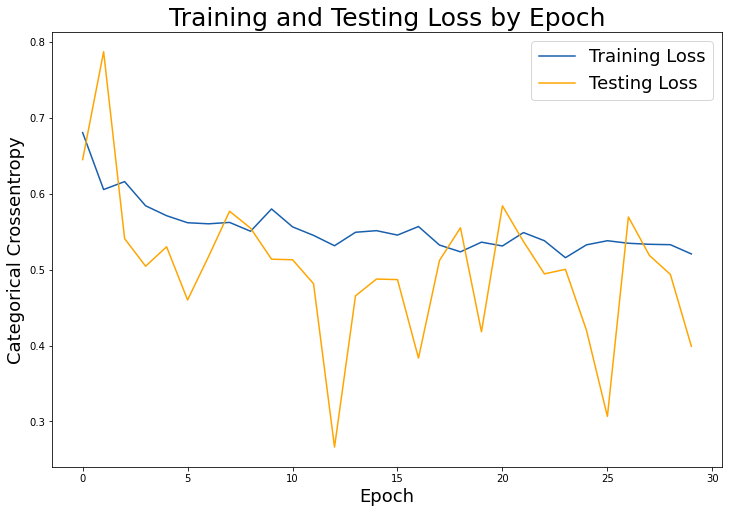

In [15]:
# Check out our train loss and test loss over epochs.
train_loss = results.history['loss']
test_loss = results.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)

plt.legend(fontsize = 18);

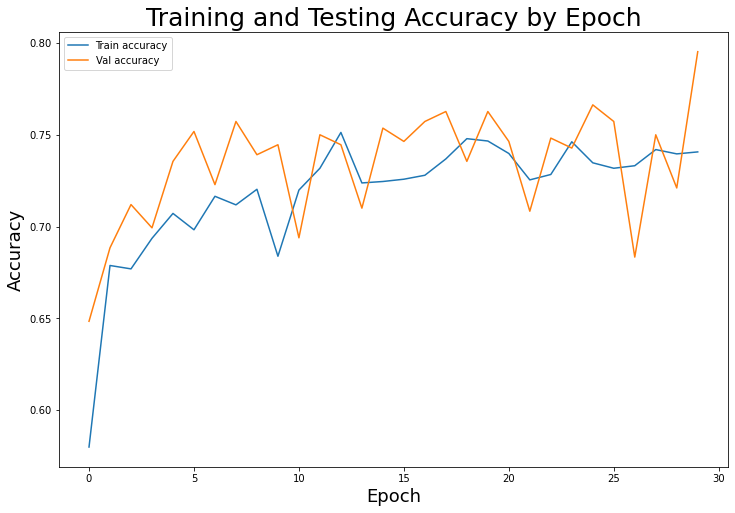

In [16]:
# Set figure size.
plt.figure(figsize=(12, 8))

plt.plot(results.history['accuracy'], label='Train accuracy')
plt.plot(results.history['val_accuracy'], label='Val accuracy')

# Set title
plt.title('Training and Testing Accuracy by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Accuracy', fontsize = 18)
plt.legend();

In [18]:
model.layers[0]